In [1]:
#!pip install seaborn

In [2]:
#!pip install openpyxl

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy                 as np
import geopandas             as gpd
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
#%matplotlib inline
sns.set()

# Carga geojson

In [4]:
# file_path= 'D:/JUAN CAMILO/DS4A/Proyecto FInal/locashp/Loca.shp'
# file_path2='D:/JUAN CAMILO/DS4A/Proyecto FInal/Bases de Datos/Bases_limpias/PharmaciesClean.csv'

filepath_Localidades = '../Mapas/poligonos-localidades.shp'
filepath_Pharmacies = '../Datasets Clean/PharmaciesClean.csv'

In [5]:
MapaLocalidades = gpd.read_file(filepath_Localidades)
MapaLocalidades

,Nombre_de_l,Acto_admini,Area_de_la_,Identificad,geometry
0,SANTA FE,Acuerdo 117 de 2003,"45170645,863322",03,"POLYGON ((-73.99446 4.61425, -73.99446 4.61425..."
1,BARRIOS UNIDOS,Acuerdo 8 de 1977,"11903448,204872",12,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
2,FONTIBON,Acuerdo 8 de 1977,"33281002,494914",09,"POLYGON ((-74.10342 4.65351, -74.10750 4.64823..."
3,ENGATIVA,Acuerdo 8 de 1977,"35880967,349154",10,"POLYGON ((-74.15547 4.71798, -74.15547 4.71798..."
4,CANDELARIA,Acuerdo 117 de 2003,"2060242,920452",17,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
5,CHAPINERO,Acuerdo 8 de 1977,"38155857,205938",02,"POLYGON ((-74.01089 4.66358, -74.01104 4.66359..."
6,CIUDAD BOLIVAR,Acuerdo 14 de 1983,"130002593,080624",19,"POLYGON ((-74.18135 4.58892, -74.18162 4.58944..."
7,SUBA,Acuerdo 8 de 1977,"100560477,718254",11,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."
8,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,"13834084,806513",18,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
9,KENNEDY,Acuerdo 8 de 1977,"38589733,814235",08,"POLYGON ((-74.11830 4.63741, -74.11845 4.63727..."


In [6]:
dic_Localidades={'TEUSAQUILLO':'Teusaquillo',
                'USAQUEN':'Usaquén',
                'CHAPINERO':'Chapinero',
                'SANTA FE':'Santa Fe',
                'SAN CRISTOBAL':'San Cristobal',
                'USME':'Usme',
                'TUNJUELITO':'Tunjuelito',
                'BOSA':'Bosa',
                'KENNEDY':'Kennedy',
                'FONTIBON':'Fontibón',
                'ENGATIVA':'Engativá',
                'SUBA':'Suba',
                'BARRIOS UNIDOS':'Barrios Unidos',
                'TEUSAQUILLO':'Teusaquillo',
                'LOS MARTIRES':'Los Mártires',
                'ANTONIO NARIÑO':'Antonio Nariño',
                'ANTONIO NARIÃO':'Antonio Nariño', 
                'PUENTE ARANDA':'Puente Aranda',
                'CANDELARIA':'La Candelaria',
                'RAFAEL URIBE URIBE':'Rafael Uribe Uribe',
                'CIUDAD BOLIVAR':'Ciudad Bolivar',
                 'SUMAPAZ':'Sumapaz'
}

In [7]:
Colsdict = {'Nombre_de_l' : 'Localidad', 'Acto_admini' : 'Acto_Administrativo',
            'Area_de_la_' : 'Area', 'Identificad' : 'ID_Number'}

MapaLocalidades.rename(columns=Colsdict,inplace = True)

MapaLocalidades['Localidad']=MapaLocalidades['Localidad'].replace(dic_Localidades)
#MapaLocalidades['geometry2']=MapaLocalidades['geometry']
MapaLocalidades

,Localidad,Acto_Administrativo,Area,ID_Number,geometry
0,Santa Fe,Acuerdo 117 de 2003,"45170645,863322",03,"POLYGON ((-73.99446 4.61425, -73.99446 4.61425..."
1,Barrios Unidos,Acuerdo 8 de 1977,"11903448,204872",12,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
2,Fontibón,Acuerdo 8 de 1977,"33281002,494914",09,"POLYGON ((-74.10342 4.65351, -74.10750 4.64823..."
3,Engativá,Acuerdo 8 de 1977,"35880967,349154",10,"POLYGON ((-74.15547 4.71798, -74.15547 4.71798..."
4,La Candelaria,Acuerdo 117 de 2003,"2060242,920452",17,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
5,Chapinero,Acuerdo 8 de 1977,"38155857,205938",02,"POLYGON ((-74.01089 4.66358, -74.01104 4.66359..."
6,Ciudad Bolivar,Acuerdo 14 de 1983,"130002593,080624",19,"POLYGON ((-74.18135 4.58892, -74.18162 4.58944..."
7,Suba,Acuerdo 8 de 1977,"100560477,718254",11,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."
8,Rafael Uribe Uribe,Acuerdo 117 de 2003,"13834084,806513",18,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
9,Kennedy,Acuerdo 8 de 1977,"38589733,814235",08,"POLYGON ((-74.11830 4.63741, -74.11845 4.63727..."


<AxesSubplot:>

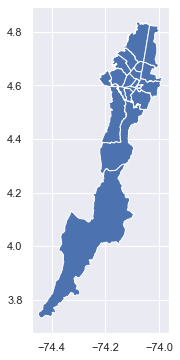

In [8]:
MapaLocalidades.plot(figsize=(12,6))

# Carga base Farmacias

In [9]:
df_pharma = pd.read_csv(filepath_Pharmacies, usecols=[1,2,3,4,5])
df_pharma.head(70)

,direccion,localidad,latitud,longitud,farmacia
0,Carrera 51 #49a-30 sur,Tunjuelito,4.6026291,-74.126861,Audifarma
1,Calle 140 #7-52,Usaquén,4.7167584,-74.030236,Belmira Plaza Drogueria
2,Carrera 15 #105-16,Usaquén,4.7079004,-74.042515,Botica Junín
3,Carrera 15 #83-08,Chapinero,4.6769435,-74.051851,Botica Junín
4,Avenida 7 #116-90,Usaquén,4.6890753,-74.034606,Botica Junín
...,...,...,...,...,...
65,Carrera 15 #102-87,Usaquén,4.7079004,-74.042515,Droguería la 109
66,Calle 100 #68a-97,Suba,4.6897188,-74.071812,Droguería La Floresta
67,Carrera 15 #124-75,Usaquén,4.7079004,-74.042515,Droguería La Rebaja
68,Avenida Primera de Mayo #19B-07 Sur,San Cristóbal,Droguería la Rebaja Avenida Primera de Mayo co...,NaN,NaN


In [10]:
df_pharma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   direccion  177 non-null    object 
 1   localidad  177 non-null    object 
 2   latitud    177 non-null    object 
 3   longitud   176 non-null    float64
 4   farmacia   176 non-null    object 
dtypes: float64(1), object(4)
memory usage: 7.0+ KB


In [11]:
df_pharma = df_pharma.drop([68],axis=0)
df_pharma.head(70)

,direccion,localidad,latitud,longitud,farmacia
0,Carrera 51 #49a-30 sur,Tunjuelito,4.6026291,-74.126861,Audifarma
1,Calle 140 #7-52,Usaquén,4.7167584,-74.030236,Belmira Plaza Drogueria
2,Carrera 15 #105-16,Usaquén,4.7079004,-74.042515,Botica Junín
3,Carrera 15 #83-08,Chapinero,4.6769435,-74.051851,Botica Junín
4,Avenida 7 #116-90,Usaquén,4.6890753,-74.034606,Botica Junín
...,...,...,...,...,...
65,Carrera 15 #102-87,Usaquén,4.7079004,-74.042515,Droguería la 109
66,Calle 100 #68a-97,Suba,4.6897188,-74.071812,Droguería La Floresta
67,Carrera 15 #124-75,Usaquén,4.7079004,-74.042515,Droguería La Rebaja
69,Calle 129 #58C-30,Usaquén,4.7077932,-74.028986,Droguería la Rebaja Calle 129


In [13]:
gdf = gpd.GeoDataFrame(df_pharma, geometry=gpd.points_from_xy(df_pharma.longitud, df_pharma.latitud))
gdf

,direccion,localidad,latitud,longitud,farmacia,geometry
0,Carrera 51 #49a-30 sur,Tunjuelito,4.6026291,-74.126861,Audifarma,POINT (-74.12686 4.60263)
1,Calle 140 #7-52,Usaquén,4.7167584,-74.030236,Belmira Plaza Drogueria,POINT (-74.03024 4.71676)
2,Carrera 15 #105-16,Usaquén,4.7079004,-74.042515,Botica Junín,POINT (-74.04252 4.70790)
3,Carrera 15 #83-08,Chapinero,4.6769435,-74.051851,Botica Junín,POINT (-74.05185 4.67694)
4,Avenida 7 #116-90,Usaquén,4.6890753,-74.034606,Botica Junín,POINT (-74.03461 4.68908)
...,...,...,...,...,...,...
172,Calle 72 #13-85,Chapinero,4.6583351,-74.060871,Supertienda Olímpica Cll 72,POINT (-74.06087 4.65834)
173,Calle 138 #52-03,Suba,4.7249766,-74.055621,Supertienda Olímpica Colina Campestre,POINT (-74.05562 4.72498)
174,Calle 64 #11-05,Chapinero,4.6504681,-74.062827,Supertienda Olímpica Cosmo 64,POINT (-74.06283 4.65047)
175,Calle 35 Sur #80-35,Usaquén,4.6266967,-74.151513,Supertienda Olímpica Kennedy 2,POINT (-74.15151 4.62670)


In [14]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 176 entries, 0 to 176
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   direccion  176 non-null    object  
 1   localidad  176 non-null    object  
 2   latitud    176 non-null    object  
 3   longitud   176 non-null    float64 
 4   farmacia   176 non-null    object  
 5   geometry   176 non-null    geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 9.6+ KB


In [16]:
basePharma = gpd.sjoin(gdf,MapaLocalidades[['Localidad','geometry']], how='left',predicate='within')
basePharma

,direccion,localidad,latitud,longitud,farmacia,geometry,index_right,Localidad
0,Carrera 51 #49a-30 sur,Tunjuelito,4.6026291,-74.126861,Audifarma,POINT (-74.12686 4.60263),19,Puente Aranda
1,Calle 140 #7-52,Usaquén,4.7167584,-74.030236,Belmira Plaza Drogueria,POINT (-74.03024 4.71676),16,Usaquén
2,Carrera 15 #105-16,Usaquén,4.7079004,-74.042515,Botica Junín,POINT (-74.04252 4.70790),16,Usaquén
3,Carrera 15 #83-08,Chapinero,4.6769435,-74.051851,Botica Junín,POINT (-74.05185 4.67694),5,Chapinero
4,Avenida 7 #116-90,Usaquén,4.6890753,-74.034606,Botica Junín,POINT (-74.03461 4.68908),16,Usaquén
...,...,...,...,...,...,...,...,...
172,Calle 72 #13-85,Chapinero,4.6583351,-74.060871,Supertienda Olímpica Cll 72,POINT (-74.06087 4.65834),5,Chapinero
173,Calle 138 #52-03,Suba,4.7249766,-74.055621,Supertienda Olímpica Colina Campestre,POINT (-74.05562 4.72498),7,Suba
174,Calle 64 #11-05,Chapinero,4.6504681,-74.062827,Supertienda Olímpica Cosmo 64,POINT (-74.06283 4.65047),5,Chapinero
175,Calle 35 Sur #80-35,Usaquén,4.6266967,-74.151513,Supertienda Olímpica Kennedy 2,POINT (-74.15151 4.62670),9,Kennedy


In [17]:
basePharma.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 176 entries, 0 to 176
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   direccion    176 non-null    object  
 1   localidad    176 non-null    object  
 2   latitud      176 non-null    object  
 3   longitud     176 non-null    float64 
 4   farmacia     176 non-null    object  
 5   geometry     176 non-null    geometry
 6   index_right  176 non-null    int64   
 7   Localidad    176 non-null    object  
dtypes: float64(1), geometry(1), int64(1), object(5)
memory usage: 12.4+ KB


<AxesSubplot:>

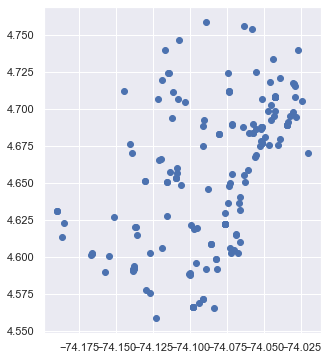

In [19]:
basePharma.geometry.plot(figsize=(12,6))

In [21]:
PharmaciesLocalidades = pd.DataFrame(basePharma.drop(columns=['index_right','geometry']))

In [22]:
PharmaciesLocalidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 176
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   direccion  176 non-null    object 
 1   localidad  176 non-null    object 
 2   latitud    176 non-null    object 
 3   longitud   176 non-null    float64
 4   farmacia   176 non-null    object 
 5   Localidad  176 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.6+ KB


In [23]:
PharmaciesLocalidades.Localidad.value_counts()

Usaquén           40
Chapinero         21
Engativá          15
Fontibón          14
Teusaquillo       13
Suba              12
Santa Fe          10
Tunjuelito         9
Bosa               9
San Cristobal      9
Puente Aranda      6
Los Mártires       5
Barrios Unidos     5
Kennedy            4
Antonio Nariño     3
Ciudad Bolivar     1
Name: Localidad, dtype: int64

In [25]:
PharmaciesLocalidades.to_csv('../Datasets Clean/PharmaciesLocalidades.csv',index=False)